<a href="https://colab.research.google.com/github/kaia-hu/kaiahu.github.io/blob/main/Commodity_Deforestation_Attribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science and Big Data - 95885 - Project 1**
<br> T03 <br>
Kaia Hu (kaiqihu)  <br>
Gargi Shekhar Mahajan (gmahajan)

**Description:** <br>
The DeDuCE dataset provides global estimates of deforestation and carbon emissions driven by agriculture and forestry from 2001–2022, covering over 180 commodities. It includes key indicators for assessing deforestation rates, risks, and mitigation strategies, aiming to support sustainable forest management and policy development

<br>**Motivation** <br>
Our team’s motivation to work on pressing environmental issues comes from a sense of urgency and responsibility. The LA wildfires have been a wake-up call for all of us, sparking our interest in delving deep into what’s fueling such events. One major reason is deforestation.
What really draws us to this project is the chance to uncover the smaller, hidden factors behind such a massive problem. From the everyday products people consume to the hidden connections between global supply chains and deforestation, we want to understand how individual choices tie into this issue. Our aim isn’t just to analyze the data but to create solutions that are actionable by everyone : governments, companies, and individuals alike.
The significance of this project lies in its potential to bridge the gap between global environmental challenges and individual responsibility. What are people eating, buying, or doing daily that contributes to such large-scale problems?

<br>**Related Work** <br>
We came across an article on the BBC that highlighted the connection between consumerism and climate change. It discusses how our everyday purchasing decisions, ranging from food to clothing are driving environmental degradation, especially through industries like agriculture and manufacturing.  This led us to the DeDuCE article, which takes a closer look at deforestation driven by commodity consumption. Building on the insights from DeDuCE, we aim to create meaningful visuals and analysis that expand beyond their study, making this complex issue more accessible and actionable for everyone. <br>
https://www.bbc.com/news/science-environment-56566377<br>
https://trase.earth/insights/deduce-new-data-to-inform-action-against-commodity-driven-deforestation



<br>**Data** <br>
Link to the Google Sheet Data: https://docs.google.com/spreadsheets/d/1W0F1Xu5-0EWqw5kMFLriTFj6Hqj84QHK/edit?usp=sharing&ouid=104819220186081826495&rtpof=true&sd=true
The dataset is huge, incorporating over 200k rows and 13 rows. The 13 rows are: Continent/Country group; ISO; Producer country; Year; Commodity group; Commodity;  Deforestation attribution, unamortized (ha); Deforestation risk, amortized (ha); Deforestation emissions excl. peat drainage, unamortized (MtCO2); Deforestation emissions excl. peat drainage, amortized (MtCO2); Peatland drainage emissions (MtCO2); Deforestation emissions incl. peat drainage, amortized (MtCO2); Quality Index: Flagging deforestation estimates.
Each row represents the deforestation attribution, risk, and emissions associated with one commodity (example: almonds) in a certain country and a given year. This data was built on the previous Pendrill et al. 2022 dataset. It is derived using a land-balance model to attribute deforestation across 135 countries in the tropics to expansion of cropland, pastures and forest plantation and the commodities produced on this land, and tracing these commodities to consumption using a two different trade models: a physical trade model and a multi-regional input-output model.


<br>**Questions** <br>
1. How does commodity deforestation vary across different continents and countries?
  - Value proposition: to inform about future directions on conservation efforts to target key vulnerable regions. Another value for the audience is informing us (consumers of food products) on how to identify less impactful products.
  - Workflow: High-level visualizations on the patterns of deforestation attribution across different continents and countries.
2. What are some commodities that are really bad for the environment?
  - Value proposition: inform consumers about the environmental impact of their food choices and urge them to make better decisions through data.
  - Workflow: Explore visual tools to demonstrate the high-deforestation-impact commodities and provide a "grocery guide" for consumers. Map the deforestation attribution of specific commodity with their global production to see if different sources of the same commodity could differ significantly in their environmental impacts.
3. How is the agricultural and forestry commodities’ deforestation risk varying throughout time? What are some interesting patterns and trends with time that could be explained by political or economic situations.
  - Value proposition: Have a better understand the data and potentially draw correlation between social events and policies with deforestation attribution.
  - Workflow: slicing the data into different years and comparing year-to-year changes in deforestation attribution and risk across different commodities and countries.

<br>**Possible Findings/Implications** <br>
1. Overall commodities in developing countries are likely to have higher deforestation attributions and risks, especially in those countries near the equator (Indonesia, Brazil..)
<br>
2. Rice, coffee beans, and certain tropical fruits that are really popular in Western countries (example: avocado) have really high deforestation attributions. And they are more massively produced in vulnerable regions.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


Reading DeDuCE dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DataScienceBigData_Project1_T03/DeDuCE_Deforestation_attribution_v1.0.0 (2001-2022).xlsx')

df.head()

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index
0,Rest of Asia,AFG,Afghanistan,2001,Fruit and nuts,"Almonds, in shell",0.355110,NaN,0.000133,NaN,4.971429e-08,4.971429e-08,0.389717
1,Rest of Asia,AFG,Afghanistan,2002,Fruit and nuts,"Almonds, in shell",0.479512,NaN,0.000211,NaN,2.488192e-07,2.488192e-07,0.409473
2,Rest of Asia,AFG,Afghanistan,2003,Fruit and nuts,"Almonds, in shell",0.741646,NaN,0.000301,NaN,1.056955e-06,1.056955e-06,0.461417
3,Rest of Asia,AFG,Afghanistan,2004,Fruit and nuts,"Almonds, in shell",0.000000,NaN,0.000000,NaN,1.056955e-06,1.056955e-06,NaN
4,Rest of Asia,AFG,Afghanistan,2005,Fruit and nuts,"Almonds, in shell",0.035786,0.322411,0.000013,0.000131,1.092214e-06,1.325824e-04,0.333994


## High Level EDA

### First, let's look at the top 10 commodities that have the highest negative environmental impacts.

<ipython-input-4-01188be68d43>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="Reds_r")


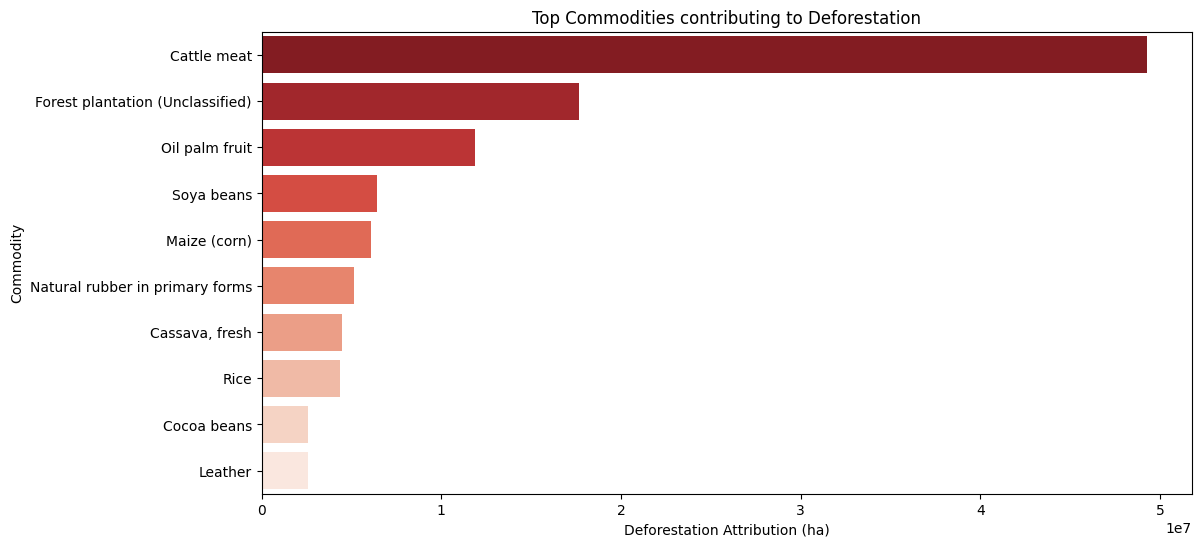

<ipython-input-4-01188be68d43>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_emitting_commodities.values, y=top_emitting_commodities.index, palette="Blues_r")


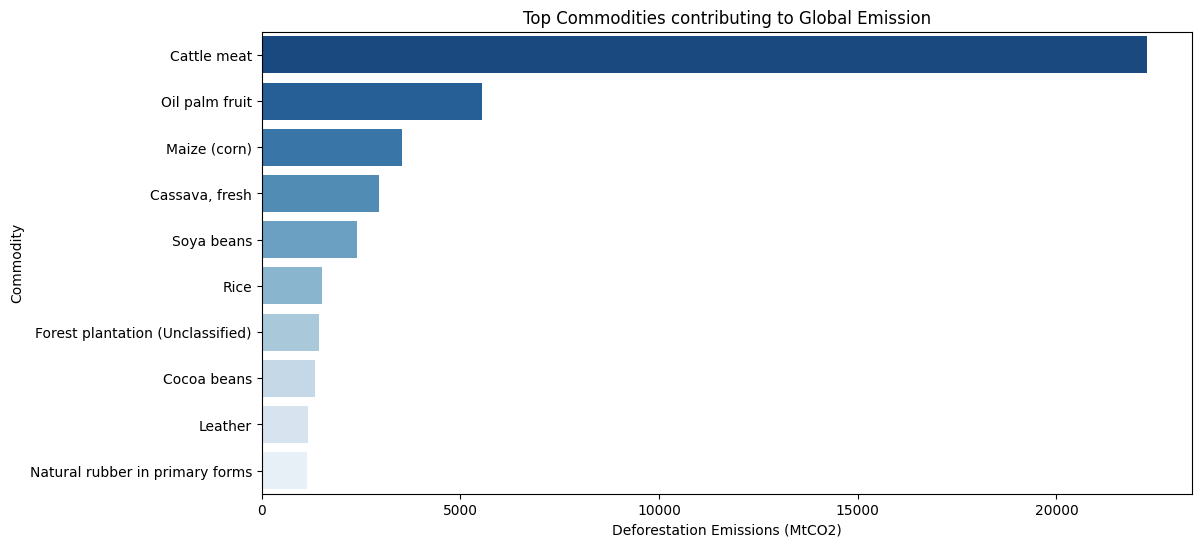

In [ ]:
# Aggregate deforestation attribution by commodity
top_commodities = df.groupby("Commodity")["Deforestation attribution, unamortized (ha)"].sum().sort_values(ascending=False).head(10)

# Aggregate deforestation emissions by commodity (including peatland)
top_emitting_commodities = df.groupby("Commodity")["Deforestation emissions incl. peat drainage, amortized (MtCO2)"].sum().sort_values(ascending=False).head(10)

# Plot top commodities by deforestation impact
plt.figure(figsize=(12, 6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="Reds_r")
plt.xlabel("Deforestation Attribution (ha)")
plt.ylabel("Commodity")
plt.title("Top Commodities contributing to Deforestation")
plt.show()

# Plot top commodities by emissions
plt.figure(figsize=(12, 6))
sns.barplot(x=top_emitting_commodities.values, y=top_emitting_commodities.index, palette="Blues_r")
plt.xlabel("Deforestation Emissions (MtCO2)")
plt.ylabel("Commodity")
plt.title("Top Commodities contributing to Global Emission")
plt.show()


This bar chart highlights the global deforestation attributed to various commodities, with cattle meat production being the leading contributor by a significant margin. Other major drivers include forest plantations (unclassified), oil palm fruit, and soybeans. The data underscores the environmental impact of agricultural and livestock industries, particularly cattle farming, which is responsible for vast deforestation worldwide.

<br> The second bar chart illustrates global greenhouse gas emissions caused by deforestation, with cattle meat production being the dominant contributor. Other commodities such as oil palm fruit, maize, and cassava also play significant roles in emissions linked to land-use change. These insights emphasize the environmental cost of agricultural practices, particularly livestock farming, which drives both deforestation and carbon emissions.



## Question 1: How does commodity deforestation vary across different continents and countries?

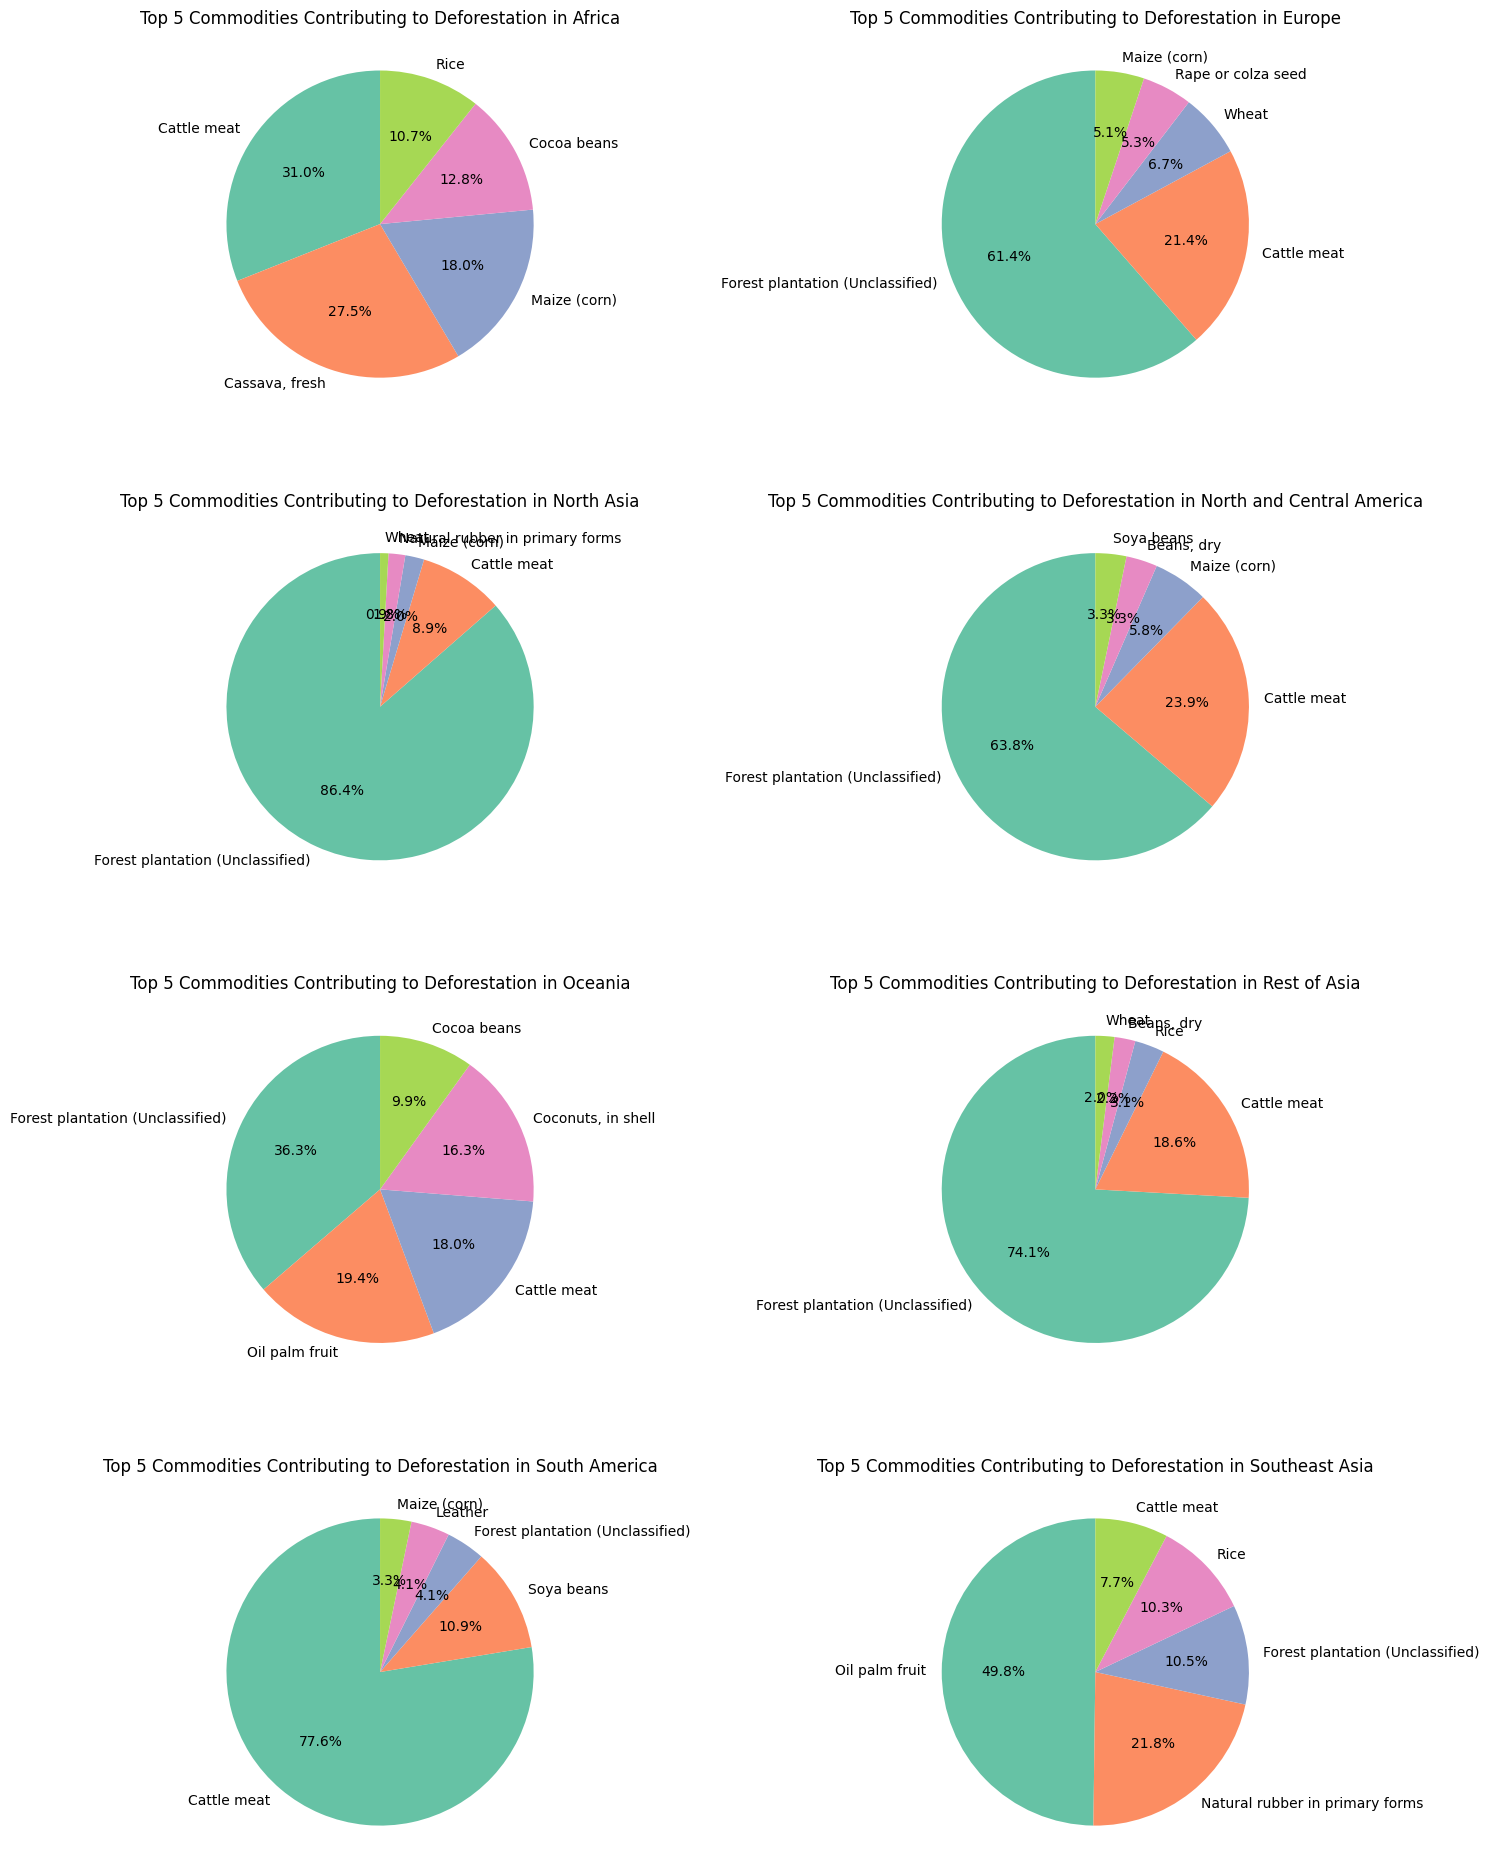

In [ ]:
#Group data by region and commodity
region_commodity_df = df.groupby(["Continent/Country group", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# List of unique regions
regions = region_commodity_df["Continent/Country group"].unique()

# Calculate the number of rows needed (3 charts per row)
import math
ncols = 2
nrows = math.ceil(len(regions) / ncols)

# Set up the grid of pie charts (one for each region)
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
fig.tight_layout(pad=5.0)

# Flatten axes array in case we have a 2D grid
axes = axes.flatten()

# Iterate through regions and create a pie chart for each
for i, region in enumerate(regions):
    # Filter data for the current region
    region_data = region_commodity_df[region_commodity_df["Continent/Country group"] == region]

    # Get the top 5 commodities for the current region based on deforestation attribution
    top_commodities = region_data.sort_values("Deforestation attribution, unamortized (ha)", ascending=False).head(5)

    # Create pie chart with the Set2 color gradient
    axes[i].pie(top_commodities["Deforestation attribution, unamortized (ha)"],
                labels=top_commodities["Commodity"],
                autopct='%1.1f%%',
                startangle=90,
                colors=plt.cm.Set2(range(len(top_commodities))))  # Use Set2 colormap

    # Set chart title
    axes[i].set_title(f"Top 5 Commodities Contributing to Deforestation in {region}")

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

Summing the total deforestation attribution in a 20-year period, the above visualization showcases the most forest-damaging commodities in each region across the world. Here are some noteworthy observations:
1. Unclassified Forest Plantation is the primary source of deforestation in many regions, including North and Central America, Europe and most significantly North Asia. Even though this dataset successfully documents over a dozen kinds of forest plantation commodities, it is odd that there is still a huge significant portion remains unclassified.
2. The most damaging commodity in South America is Cattle Meat, contributing to over 77% of accumulated deforestation attribution. On the other hand, the most damaging commodity in Southeast Asia is Oil Palm Fruit production, contributing to nearly 50% of accumulated deforestation attribution. These two highlights also match with the natural environment of these two regions which make these two commodities viable. They are the home to two of the remaining largest rainforests in the world: the Amazon and the Sundaland rainforests. These two regions are also dominated by developing countries whose economies mostly rely on utilizing their natural resources.

 ### Next, let's dig into the geographic distribution of environmental impact of deforestation. What are the countries that are especially impacted by certain commodities?


In [ ]:
import plotly.express as px

# Aggregate deforestation by commodity group and producer country
df_aggregated = df.groupby(['Commodity group', 'Producer country'])['Deforestation attribution, unamortized (ha)'].sum().reset_index()

# Create a choropleth map
fig = px.choropleth(df_aggregated,
                    locations="Producer country",  # Country locations
                    locationmode="country names",  # Use country names for mapping
                    color="Deforestation attribution, unamortized (ha)",  # Deforestation values
                    hover_name="Producer country",  # Show country names on hover
                    color_continuous_scale="Reds",  # Red scale to indicate deforestation severity
                    animation_frame="Commodity group",  # Animate by commodity group
                    title="Geographic Distribution of Deforestation by Commodity Group")

# Update layout for better presentation
fig.update_layout(
    geo=dict(showcoastlines=True, coastlinecolor="Black"),
    title_x=0.5,  # Center title
    title_y=0.95,  # Adjust title position
)

# Show the interactive map
fig.show()


This map visualizes the geographic hotspots for deforestation attributed to various commodity groups. South America, Central Africa, and Southeast Asia emerge as key regions, reflecting the impact of activities like cattle ranching, palm oil production, and cereal cultivation.

#### This is to add another feature of agricultural land per country. This is reading an Agricultural Land dataset and joining with deduce dataset

In [ ]:
# Load Agricultural Land dataset
df_agri_land = pd.read_csv("/content/drive/MyDrive/DataScienceBigData_Project1_T03/AgriculturalLand.csv")

# Rename 'Land Area' to match our intended merged dataset
df_agri_land.rename(columns={"Land Area": "LandArea_km2"}, inplace=True)

# Select only necessary columns
df_agri_land = df_agri_land[["Country Name", "Country Code", "LandArea_km2"]]

# Merge datasets on Country Code
df = df.merge(df_agri_land, left_on="ISO", right_on="Country Code", how="left")

# Drop redundant 'Country Name' from agri dataset (if necessary)
df.drop(columns=["Country Name", "Country Code"], inplace=True)

df.head()

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2
0,Rest of Asia,AFG,Afghanistan,2001,Fruit and nuts,"Almonds, in shell",0.355110,NaN,0.000133,NaN,4.971429e-08,4.971429e-08,0.389717,383130.0
1,Rest of Asia,AFG,Afghanistan,2002,Fruit and nuts,"Almonds, in shell",0.479512,NaN,0.000211,NaN,2.488192e-07,2.488192e-07,0.409473,383130.0
2,Rest of Asia,AFG,Afghanistan,2003,Fruit and nuts,"Almonds, in shell",0.741646,NaN,0.000301,NaN,1.056955e-06,1.056955e-06,0.461417,383130.0
3,Rest of Asia,AFG,Afghanistan,2004,Fruit and nuts,"Almonds, in shell",0.000000,NaN,0.000000,NaN,1.056955e-06,1.056955e-06,NaN,383130.0
4,Rest of Asia,AFG,Afghanistan,2005,Fruit and nuts,"Almonds, in shell",0.035786,0.322411,0.000013,0.000131,1.092214e-06,1.325824e-04,0.333994,383130.0


#### Finding deforestation per unit area, that's deforestation attribution/ agricultural land in sq km & the top countries with highest deforestation per sq km<br>
This is to note that large countries might have high deforestation in absolute terms, but smaller countries with intense deforestation might be at higher risk. Looking into irrespective of the land size, what is the deforestation rate

In [ ]:
# Avoid division by zero errors
df = df[df["LandArea_km2"] > 0]

# Calculate deforestation per unit area (ha/km²)
df["Deforestation per km2"] = df["Deforestation attribution, unamortized (ha)"] / (df["LandArea_km2"] * 100)

# Display top 10 countries with highest deforestation intensity
top_deforestation_intensity = df.groupby("Producer country")["Deforestation per km2"].sum().sort_values(ascending=False).head(10)

# Create a Plotly bar chart
fig = px.bar(
    top_deforestation_intensity,
    x=top_deforestation_intensity.index,
    y=top_deforestation_intensity.values,
    labels={'x': 'Country', 'y': 'Deforestation Intensity (ha/km²)'},
    title='Top 10 Countries with Highest Deforestation per Sq. Km',
    color=top_deforestation_intensity.values,
    color_continuous_scale='reds'
)

# Customize the layout
fig.update_layout(
    xaxis_tickangle=-35,
    showlegend=True,
    plot_bgcolor='white',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

Finding deforestation per square kilometer for each continent/country group

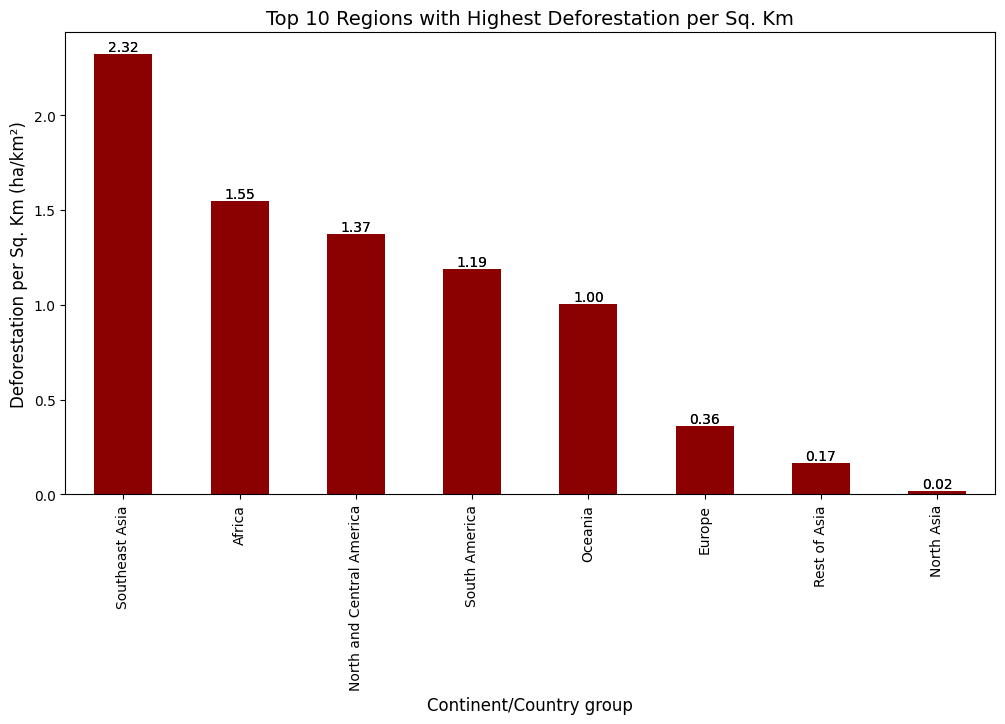

In [ ]:
continent_deforestation = df.groupby('Continent/Country group')['Deforestation per km2'].sum()

# Step 3: Sort and get the top 10 regions with highest deforestation intensity
top_deforestation_regions = continent_deforestation.sort_values(ascending=False).head(10)

# Step 4: Plot the top 10 regions with highest deforestation per sqkm
plt.figure(figsize=(12, 6))
top_deforestation_regions.plot(kind='bar', color='darkred')

plt.xlabel('Continent/Country Group', fontsize=12)
plt.ylabel('Deforestation per Sq. Km (ha/km²)', fontsize=12)
plt.title('Top 10 Regions with Highest Deforestation per Sq. Km', fontsize=14)
plt.xticks(rotation=45)
ax = top_deforestation_regions.plot(kind="bar", color="darkred")

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(),  # Position the text
            f'{i.get_height():.2f}',  # Format the value with 2 decimal places
            ha='center', va='bottom', fontsize=10, color='black')
plt.show()

## Question 2: Which Commodities Have the Worst Environmental Impact?
In this section, we take a consumer-focused approach to understanding which commodities contribute the most to deforestation and from which regions they originate.

We begin by examining the big picture, identifying the top commodities driving deforestation globally before diving deeper into regional impacts.

In [ ]:
# Aggregate deforestation per commodity globally
df_top_commodities = df.groupby("Commodity")["Deforestation attribution, unamortized (ha)"].sum().reset_index()
fig = px.treemap(df_top_commodities,
                 path=['Commodity'],
                 values='Deforestation attribution, unamortized (ha)',
                 color='Deforestation attribution, unamortized (ha)',
                 color_continuous_scale='Reds',
                 title="Deforestation Impact Globally by Commodity")

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

This treemap visualizes the impact of various commodities on deforestation, measured in hectares. Cattle meat is the largest driver of deforestation, far surpassing other commodities like forest plantations, oil palm fruit, and soybeans. The chart highlights the significant role of livestock and agriculture in global forest loss, with cattle meat alone responsible for over 45 million hectares of deforestation. Other contributors, such as maize, rice, and cocoa beans, have a comparatively smaller impact.

### **Commodities Driving Deforestation by Region** <br>
Next, we analyze the top commodities contributing to deforestation across different country groups. This helps us identify which commodities are most destructive and the regions where their impact is the greatest.

In [ ]:
commodities_of_interest = [
    'Cattle meat',
    'Oil palm fruit',
    'Soya beans',
    'Maize (corn)',
    'Natural rubber in primary forms'
]

df_filtered = df[df['Commodity'].isin(commodities_of_interest)]

# Step 2: Aggregate the deforestation by commodity and country
df_clean = df_filtered[['Commodity', 'Continent/Country group', 'Deforestation attribution, unamortized (ha)']].dropna()
df_aggregated = df_clean.groupby(['Commodity', 'Continent/Country group']).agg({
    'Deforestation attribution, unamortized (ha)': 'sum'
}).reset_index()

# Step 3: Create the Sankey diagram
# Define unique nodes for the selected commodities and countries
commodities = df_aggregated['Commodity'].unique().tolist()
countries = df_aggregated['Continent/Country group'].unique().tolist()

# Create node labels combining commodities and countries
node_labels = commodities + countries

# Map nodes to indices
commodity_indices = {commodity: idx for idx, commodity in enumerate(commodities)}
country_indices = {country: idx + len(commodities) for idx, country in enumerate(countries)}

# Create links (flow of deforestation)
sources = []
targets = []
values = []

for idx, row in df_aggregated.iterrows():
    commodity_idx = commodity_indices[row['Commodity']]
    country_idx = country_indices[row['Continent/Country group']]

    sources.append(commodity_idx)
    targets.append(country_idx)
    values.append(row['Deforestation attribution, unamortized (ha)'])

# Step 4: Create the Sankey diagram
sankey = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Step 5: Customize and display the plot
sankey.update_layout(
    title_text="Deforestation Flows from Selected Commodities to Producer Countries",
    font_size=10,
    width=1000,
    height=700
)

# Show the figure
sankey.show()

The Sankey diagram illustrates the flow of deforestation caused by selected commodities to their primary producer regions. Cattle meat is the largest contributor, with South America being the most affected region. Other commodities, such as soybeans, maize, and oil palm fruit, show smaller but significant deforestation flows to regions like Southeast Asia and Africa.
- Cattle meat production is strongly linked to South America, this is a primary driver of deforestation in the Amazon and other South American forests. <br>
- Oil palm fruit and natural rubber production are predominantly causing deforestation in Southeast Asia, reflecting the expansion of palm oil plantations and rubber cultivation in countries like Indonesia and Malaysia.
Soya beans and maize (corn) have more distributed impacts across multiple regions, though South America appears to be significantly affected by soya production as well.<br>

In [ ]:
# Filter the dataset to only include "Cattle meat"
commodities_of_interest = ['Cattle meat']
df_filtered = df[df['Commodity'].isin(commodities_of_interest)]

# Step 2: Aggregate the deforestation by commodity (Cattle Meat) and producer country
df_clean = df_filtered[['Commodity', 'Continent/Country group', 'Deforestation attribution, unamortized (ha)']].dropna()
df_aggregated = df_clean.groupby(['Commodity', 'Continent/Country group']).agg({
    'Deforestation attribution, unamortized (ha)': 'sum'
}).reset_index()

# Step 3: Create the Sankey diagram
# Define unique nodes for "Cattle Meat" and the countries
commodities = df_aggregated['Commodity'].unique().tolist()
countries = df_aggregated['Continent/Country group'].unique().tolist()

# Create node labels combining commodity and countries
node_labels = commodities + countries

# Map nodes to indices
commodity_indices = {commodity: idx for idx, commodity in enumerate(commodities)}
country_indices = {country: idx + len(commodities) for idx, country in enumerate(countries)}

# Create links (flow of deforestation)
sources = []
targets = []
values = []

for idx, row in df_aggregated.iterrows():
    commodity_idx = commodity_indices[row['Commodity']]
    country_idx = country_indices[row['Continent/Country group']]

    sources.append(commodity_idx)
    targets.append(country_idx)
    values.append(row['Deforestation attribution, unamortized (ha)'])

# Step 4: Create the Sankey diagram
sankey = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Step 5: Customize and display the plot
sankey.update_layout(
    title_text="Deforestation Flows from Cattle Meat to Producer Countries",
    font_size=10,
    width=1000,
    height=700
)

# Show the figure
sankey.show()

This Sankey chart shows that South America, out of all country groups is affected by cattle meat the most.

### The Role of Cattle in Deforestation
A significant portion of global deforestation is driven by cattle farming, particularly in certain regions like South America. However, this trend does not hold for all country groups. In other regions, different commodities—such as soy, palm oil, or timber—play a larger role in forest loss.

To understand this better, let's delve deeper into:

* Where cattle-driven deforestation is most severe
* How it compares to other deforestation-linked commodities across regions

To better understand the impact of cattle farming on deforestation, we’ve included a dataset that tracks beef production by country. By comparing beef production across different nations, we can identify the largest producers and explore the correlation between high beef production and deforestation. This comparison will help us determine whether significant beef production is consistently linked to large-scale deforestation, or if other factors come into play in different regions.









In [ ]:
# Load the dataset
df_beefProduction = pd.read_excel('/content/drive/MyDrive/DataScienceBigData_Project1_T03/psd_livestock.xlsx')

# Group by country and sum the beef production value
country_beef_production = df_beefProduction.groupby('Country_Name')['Value'].sum().reset_index()

# Sort the countries based on beef production (in descending order)
country_beef_production = country_beef_production.sort_values(by='Value', ascending=False)

# Select the top N countries (e.g., top 10 countries)
top_countries = country_beef_production.head(10).sort_values(by='Value', ascending=True)

# Create a bar chart with Plotly
fig = px.bar(top_countries,
             x='Value',
             y='Country_Name',
            #  orientation='',
             title='Top Countries by Beef Production',
             labels={'Value': 'Beef Production Value', 'Country_Name': 'Country'},
             color='Value',  # Optional: to add color scaling
             color_continuous_scale='Viridis')

# Show the plot
fig.show()

This graph illustrates the top beef-producing countries, with China leading by a significant margin compared to the others. Following China are the United States, India, and Brazil, which also have substantial beef production industries.
<br>
Now, let's compare the cattle meat production to deforestation caused by cattle meat.









In [ ]:
# Group by country and sum the beef production value
country_beef_production = df_beefProduction.groupby('Country_Name')['Value'].sum().reset_index()

# Sort the countries based on beef production (in descending order)
country_beef_production = country_beef_production.sort_values(by='Value', ascending=False)

# Select the top N countries (e.g., top 5 countries)
top_countries = country_beef_production.head(5)

# Calculate the sum of beef production for countries not in the top 5
other_countries_value = country_beef_production.iloc[5:]['Value'].sum()

# Create a new DataFrame for "Others"
others = pd.DataFrame({'Country_Name': ['Others'], 'Value': [other_countries_value]})

# Concatenate the "Others" row with the top 5 countries
top_countries = pd.concat([top_countries, others], ignore_index=True)


# Create a pie chart
fig = go.Figure(go.Pie(
    labels=top_countries['Country_Name'],  # Labels for the pie chart (country names)
    values=top_countries['Value'],  # Values for the pie chart (beef production)
    hole=0.3,  # Makes it a donut chart if you want (optional)
    title="Top 5 Countries by Beef Production"

))

# Add a title on top
fig.update_layout(
    title_text="Top 5 Countries by Beef Production (Others Combined)",  # Title above the chart
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
    font=dict(size=14)  # Font size for the title
)

# Show the pie chart
fig.show()


# Filter the dataset to only include "Cattle meat"
commodities_of_interest = ['Cattle meat']
df_filtered = df[df['Commodity'].isin(commodities_of_interest)]

# Step 2: Aggregate the deforestation by commodity (Cattle Meat) and producer country
df_clean = df_filtered[['Commodity', 'Producer country', 'Deforestation attribution, unamortized (ha)']].dropna()
df_aggregated = df_clean.groupby(['Commodity', 'Producer country']).agg({
    'Deforestation attribution, unamortized (ha)': 'sum'
}).reset_index()

# Step 3: Sort the countries based on deforestation (in descending order)
df_aggregated_sorted = df_aggregated.sort_values(by='Deforestation attribution, unamortized (ha)', ascending=False)

# Select the top N countries (e.g., top 5 countries)
top_countries = df_aggregated_sorted.head(5)

# Step 4: Create a pie chart
fig = go.Figure(go.Pie(
    labels=top_countries['Producer country'],  # Labels for the pie chart (producer countries)
    values=top_countries['Deforestation attribution, unamortized (ha)'],  # Values for the pie chart (deforestation attribution)
    hole=0.3,  # Optional: makes it a donut chart
    title="Beef Production by Country"
))

fig.update_layout(
    title_text="Deforestation Impact of Cattle Meat Production by Country",  # Title above the chart
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
    font=dict(size=14)  # Font size for the title
)


# Show the pie chart
fig.show()

The first graph displays the top five countries contributing to global beef production, with China leading at 26.7%, followed by the United States (11.9%), India (11.1%), Brazil (8.41%), and the European Union (7.89%). The remaining countries are grouped under "Others," which collectively account for the largest share at 33.9%.

The second graph highlights the deforestation impact of cattle meat production, where Brazil dominates at 78%, indicating its significant environmental footprint. Other contributors include Paraguay (9.45%), Colombia (5.04%), Bolivia (4.37%), and Argentina (3.17%). These graphs emphasize the global distribution of beef production and Brazil's outsized role in deforestation linked to cattle farming practices.

**Brazil, eventhough has the highest deforestation impact significantly, is not the largest contributor to beef production**

Let's dig a little deeper into Brazil

### Brazil's deforestation impact
It's interesting to see how Brazil deforestation rate is so high.
Let's look at the top commodities affecting deforestation in Brazil


In [ ]:
# Filter the dataset to include only data for Brazil
df_brazil = df[df['Producer country'] == 'Brazil']

# Aggregate deforestation by commodity for Brazil
df_brazil_aggregated = df_brazil.groupby('Commodity').agg({
    'Deforestation attribution, unamortized (ha)': 'sum'
}).reset_index()

# Filter out commodities that did not contribute to deforestation (Deforestation attribution == 0 or NaN)

# Sort the commodities based on deforestation contribution (in descending order)
df_brazil_aggregated = df_brazil_aggregated.sort_values(by='Deforestation attribution, unamortized (ha)', ascending=False)
df_brazil_aggregated = df_brazil_aggregated.head(5)


# Create a bar chart
fig = go.Figure(go.Bar(
    x=df_brazil_aggregated['Commodity'],  # Commodities
    y=df_brazil_aggregated['Deforestation attribution, unamortized (ha)'],  # Deforestation attribution (ha)
    marker=dict(color='green'),  # Optional: color of the bars
))

# Update the layout with a title and labels
fig.update_layout(
    title="Commodities Contributing to Deforestation in Brazil",
    xaxis_title="Commodity",
    yaxis_title="Deforestation Attribution (ha)",
    font=dict(size=12),
    title_x=0.5,  # Center the title
    title_y=0.95  # Adjust the title position
)

# Show the bar chart
fig.show()

The bar chart highlights the role of various commodities in deforestation. This chart emphasizes the dominant role of cattle farming in driving deforestation in Brazil.  Other commodities, such as soybeans, leather, forest plantations (unclassified), and maize (corn), have significantly smaller impacts.



As expected, cattle meat is the highest contributor to deforestation, particularly in countries like Brazil. Now, let’s take a closer look at the trends of deforestation caused by cattle farming in Brazil. Has this always been the case, or have there been shifts in the patterns over time? By examining historical data, we can uncover whether the link between cattle farming and deforestation has remained consistent or if recent changes in production practices and policies have influenced the extent of the environmental impact.









In [ ]:
# Aggregate deforestation by year
df_brazil_yearly = df_brazil[df_brazil['Commodity'] == 'Cattle meat']

df_brazil_yearly = df_brazil.groupby('Year').agg({
    'Deforestation attribution, unamortized (ha)': 'sum'
}).reset_index()



# Create a line chart to show the trend over the years
fig = go.Figure(go.Scatter(
    x=df_brazil_yearly['Year'],  # Years on the x-axis
    y=df_brazil_yearly['Deforestation attribution, unamortized (ha)'],  # Deforestation attribution (ha) on the y-axis
    mode='lines+markers',  # Show both lines and markers
    marker=dict(color='green'),  # Color of the markers and line
))

# Update the layout with a title and labels
fig.update_layout(
    title="Deforestation Trend in Brazil Over the Years by Cattle meat",
    xaxis_title="Year",
    yaxis_title="Deforestation Attribution (ha)",
    font=dict(size=12),
    title_x=0.5,  # Center the title
    title_y=0.95  # Adjust the title position
)

# Show the plot
fig.show()

This chart shows a high rise in deforestation due to cattle meat in Brazil in around 2004 and 2022.


In [ ]:
# Filter the df_beefProduction dataset to include only data for Brazil
df_brazil_beef = df_beefProduction[(df_beefProduction['Country_Name'] == 'Brazil') &
                                   (df_beefProduction['Calendar_Year'] > 2000)]
# Aggregate beef production by year
df_brazil_beef_yearly = df_brazil_beef.groupby('Calendar_Year').agg({
    'Value': 'sum'  # Sum of beef production for each year
}).reset_index()

# Create a line chart to show the trend of beef production over the years
fig = go.Figure(go.Scatter(
    x=df_brazil_beef_yearly['Calendar_Year'],  # Years on the x-axis
    y=df_brazil_beef_yearly['Value'],  # Beef production on the y-axis
    mode='lines+markers',  # Show both lines and markers
    marker=dict(color='blue'),  # Color of the markers and line
))

# Update the layout with a title and labels
fig.update_layout(
    title="Beef Production Trend in Brazil Over the Years",
    xaxis_title="Year",
    yaxis_title="Beef Production Value",
    font=dict(size=12),
    title_x=0.5,  # Center the title
    title_y=0.95  # Adjust the title position
)

# Show the plot
fig.show()

This chart shows a significant rise in production of cattle meat in 2022 and then a sudden decrease and high again by 2024.

*Discussion* :It’s evident that the two charts don’t align. The deforestation rate due to cattle farming was at its peak even when beef production was not the highest. This presents an important point for discussion: Are there discrepancies in the data, or were there other factors at play during those times? We need to explore potential reasons such as policy changes, economic shifts, or illegal land clearing that may have contributed to the high deforestation rates, even when beef production wasn't at its peak. This will help us understand the broader context behind these trends and what may have influenced them.
Notably, illegal deforestation has played a significant role; in December 2022, Brazilian federal prosecutors reported that nearly 17% of cattle purchased by JBS SA in Pará state originated from ranches involved in illegal deforestation. https://en.wikipedia.org/wiki/JBS_S.A.
 Additionally, land speculation practices have contributed to deforestation; unproductive cattle ranching is sometimes used for land speculation, leading to land conversion without necessarily increasing beef production







### Sustainability of Production
From a consumer perspective, a metric that can help understand the relationship between production and deforestation caused by a commodity is the Deforestation-to-Production Ratio. This metric provides a clearer picture of how much deforestation occurs for each unit of production of a commodity, making it easier for consumers to assess the environmental impact of their choices. By examining this ratio, consumers can make more informed decisions about the products they buy, opting for those with lower environmental impacts.

Here, we have analyzed specifically for cattle meat but this can be expanded to other commodities too

In [ ]:
# Merge the beef production data with the deforestation data
df_merged = pd.merge(df_aggregated_sorted[['Producer country', 'Deforestation attribution, unamortized (ha)']],
                     country_beef_production[['Country_Name', 'Value']],
                     left_on='Producer country',
                     right_on='Country_Name',
                     how='left')

# Calculate the deforestation-to-production ratio
df_merged['Deforestation-to-Production Ratio'] = df_merged['Deforestation attribution, unamortized (ha)'] / df_merged['Value']

# Sort the countries by this ratio in descending order
df_merged_sorted = df_merged.sort_values(by='Deforestation-to-Production Ratio', ascending=False)

# Remove rows where either beef production or deforestation is 0
# df_merged_sorted = df_merged_sorted[(df_merged_sorted['Value'] > 0) &
                                    # (df_merged_sorted['Deforestation attribution, unamortized (ha)'] > 0) & df_merged_sorted['Deforestation-to-Production Ratio'] > 0]

# Filter for only the countries of interest: Brazil, China, United States, India
selected_countries = ['Brazil', 'China', 'United States', 'India']
df_merged_filtered = df_merged_sorted[df_merged_sorted['Producer country'].isin(selected_countries)]
print(df_merged_filtered[df_merged_filtered['Country_Name']=='India']
)# Select the top 10 countries (although we've already filtered down to 4)
df_merged = df_merged_filtered[['Producer country', 'Value', 'Deforestation attribution, unamortized (ha)','Deforestation-to-Production Ratio']]

# Create the stacked bar chart with text outside the bars
fig = go.Figure(data=[
    go.Bar(
        name='Beef Production',
        x=df_merged_filtered['Producer country'],
        y=df_merged_filtered['Value'],
        text=df_merged_filtered['Value'],  # Add the text for Beef Production value
        textposition='outside',  # Position the text outside the bar
        hoverinfo='x+y+text'  # Show the value when hovering
    ),
    go.Bar(
        name='Deforestation',
        x=df_merged_filtered['Producer country'],
        y=df_merged_filtered['Deforestation attribution, unamortized (ha)'],
        text=df_merged_filtered['Deforestation attribution, unamortized (ha)'],  # Add the text for Deforestation value
        textposition='outside',  # Position the text outside the bar
        hoverinfo='x+y+text'  # Show the value when hovering
    )
])

# Add custom layout settings
fig.update_layout(
    barmode='stack',
    title="Beef Production vs Deforestation by Country (Brazil, China, United States, India)",
    xaxis_title="Country",
    yaxis_title="Value",
    font=dict(size=12),
    title_x=0.5,
    title_y=0.95
)

# Show the chart
fig.show()

   Producer country  Deforestation attribution, unamortized (ha) Country_Name  \
24            India                                  193302.4299        India   

          Value  Deforestation-to-Production Ratio  
24  89888996.41                            0.00215  


This stacked bar chart compares the deforestation (in red) and production (in blue) of cattle meat in different countries. Evidently, the deforestation rate in Brazil is the highest and other countries negligible compared the production.

## Question 3: How is the agricultural and forestry commodities’ deforestation risk vary throughout time?

**This part of the study will focus on interesting trends we observed in Asia, where we are from.**

In [ ]:
# Create individual dataframe that represents Southeast Asia
df_se_asia = df[df['Continent/Country group']=='Southeast Asia']
df_se_asia.head()

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
24948,Southeast Asia,BRN,Brunei,2001,Fruit and nuts,Bananas,1.063993e+00,NaN,2.056178e-03,NaN,0.000007,0.000007,0.259393,134.0,7.940243e-05
24949,Southeast Asia,BRN,Brunei,2002,Fruit and nuts,Bananas,3.125836e-17,NaN,6.938518e-20,NaN,0.000007,0.000007,0.239126,134.0,2.332713e-21
24950,Southeast Asia,BRN,Brunei,2003,Fruit and nuts,Bananas,0.000000e+00,NaN,-8.395166e-20,NaN,0.000007,0.000007,NaN,134.0,0.000000e+00
24951,Southeast Asia,BRN,Brunei,2004,Fruit and nuts,Bananas,1.784604e+01,NaN,5.337809e-02,NaN,0.000220,0.000220,0.255379,134.0,1.331794e-03
24952,Southeast Asia,BRN,Brunei,2005,Fruit and nuts,Bananas,2.501427e+01,8.784859,4.145705e-02,0.019378,0.000426,0.019805,0.255179,134.0,1.866736e-03


In [ ]:
# Countries in Southeast Asia
df_se_asia['Producer country'].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'],
      dtype=object)

In [ ]:
# Create individual dataframe that represents North Asia
df_n_asia = df[df['Continent/Country group']=='North Asia']
df_n_asia.head()

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
36234,North Asia,CHN,China,2001,Fruit and nuts,"Almonds, in shell",2.295327,NaN,0.000754,NaN,0.000002,0.000002,0.344546,5206950.0,4.408199e-09
36235,North Asia,CHN,China,2002,Fruit and nuts,"Almonds, in shell",2.428879,NaN,0.000924,NaN,0.000004,0.000004,0.305116,5206950.0,4.664686e-09
36236,North Asia,CHN,China,2003,Fruit and nuts,"Almonds, in shell",1.130593,NaN,0.000642,NaN,0.000004,0.000004,0.307602,5206950.0,2.171316e-09
36237,North Asia,CHN,China,2004,Fruit and nuts,"Almonds, in shell",2.644064,NaN,0.000943,NaN,0.000006,0.000006,0.318981,5206950.0,5.077952e-09
36238,North Asia,CHN,China,2005,Fruit and nuts,"Almonds, in shell",0.862890,1.872351,0.000323,0.000717,0.000006,0.000723,0.322299,5206950.0,1.657189e-09


In [ ]:
# Countries in North Asia
df_n_asia['Producer country'].unique()

array(['China', 'Kazakhstan', 'Mongolia', 'Russia'], dtype=object)

In [ ]:
# Create individual dataframe that represents Rest of Asia
df_r_asia = df[df['Continent/Country group']=='Rest of Asia']
df_r_asia.head()

,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
0,Rest of Asia,AFG,Afghanistan,2001,Fruit and nuts,"Almonds, in shell",0.355110,NaN,0.000133,NaN,4.971429e-08,4.971429e-08,0.389717,383130.0,9.268654e-09
1,Rest of Asia,AFG,Afghanistan,2002,Fruit and nuts,"Almonds, in shell",0.479512,NaN,0.000211,NaN,2.488192e-07,2.488192e-07,0.409473,383130.0,1.251564e-08
2,Rest of Asia,AFG,Afghanistan,2003,Fruit and nuts,"Almonds, in shell",0.741646,NaN,0.000301,NaN,1.056955e-06,1.056955e-06,0.461417,383130.0,1.935756e-08
3,Rest of Asia,AFG,Afghanistan,2004,Fruit and nuts,"Almonds, in shell",0.000000,NaN,0.000000,NaN,1.056955e-06,1.056955e-06,NaN,383130.0,0.000000e+00
4,Rest of Asia,AFG,Afghanistan,2005,Fruit and nuts,"Almonds, in shell",0.035786,0.322411,0.000013,0.000131,1.092214e-06,1.325824e-04,0.333994,383130.0,9.340444e-10


In [ ]:
# Countries in the Rest of Asia
df_r_asia['Producer country'].unique()

array(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan',
       'Cyprus', 'Georgia', 'India', 'Iran', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kyrgyzstan', 'Lebanon', 'Maldives', 'Nepal',
       'North Korea', 'Oman', 'Pakistan', 'Palestine', 'South Korea',
       'Sri Lanka', 'Syria', 'Tajikistan', 'Turkey', 'Turkmenistan',
       'Uzbekistan', 'Yemen'], dtype=object)

### Continents Overview of Total Deforestation Attribution of Different Commodities by Years

**Some background EDA indicates that Forest Plantation (Unclassified) takes up a huge proportion, going forward this commodities will be filtered out so that the trends of other commodities could be more prominent. However, before that step, let's first look at the patterns and trends around Unclassified Forest Plantation.**

In [ ]:
# Calculate the proportion of deforestation attribution of "Forest plantation (Unclassified)"
def calculate_prop(df):
    total_deforestation = df.groupby("Year")["Deforestation attribution, unamortized (ha)"].sum()
    unclassified_plantation = df[df["Commodity"] == "Forest plantation (Unclassified)"]\
        .groupby("Year")["Deforestation attribution, unamortized (ha)"].sum()
    proportion = (unclassified_plantation / total_deforestation).reset_index()
    proportion.rename(columns={"Deforestation attribution, unamortized (ha)": "Proportion"}, inplace=True)
    return proportion

prop_n = calculate_prop(df_n_asia)
prop_se = calculate_prop(df_se_asia)
prop_r = calculate_prop(df_r_asia)

Text(0.5, 1.0, "Deforestation Attribution of 'Forest plantation (Unclassified)' in the Rest of Asia")

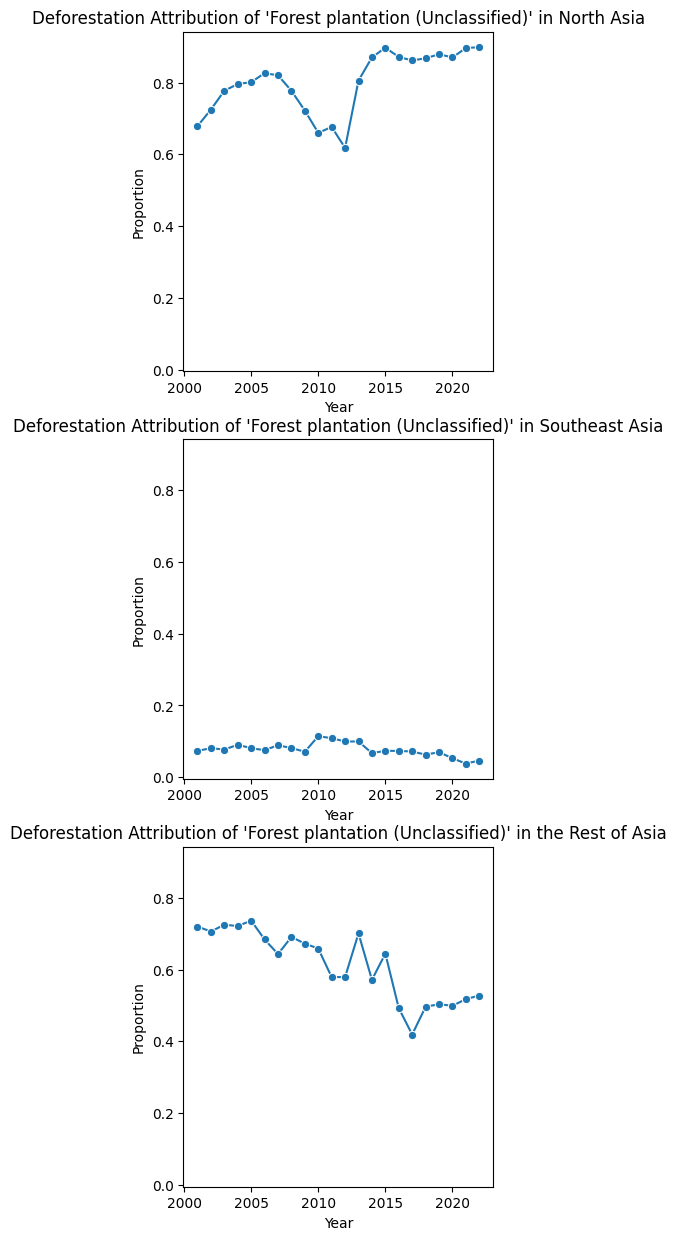

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(4, 15), sharey=True)

sns.lineplot(data=prop_n, x="Year", y="Proportion", marker="o", ax=axes[0])
axes[0].set_title("Deforestation Attribution of 'Forest plantation (Unclassified)' in North Asia")

sns.lineplot(data=prop_se, x="Year", y="Proportion", marker="o", ax=axes[1])
axes[1].set_title("Deforestation Attribution of 'Forest plantation (Unclassified)' in Southeast Asia")

sns.lineplot(data=prop_r, x="Year", y="Proportion", marker="o", ax=axes[2])
axes[2].set_title("Deforestation Attribution of 'Forest plantation (Unclassified)' in the Rest of Asia")

From these charts, it is evident that Forest plantation (Unclassified) takes up a huge proportion (near 90%) of total Deforestation Attribution in North Asia, while 0 in Southeast Asia. That ratio is also high in the Rest of Asia pre-2015, but it had declined significantly after. Therefore, it is interesting to see why this commodity contribute this significantly in North Asia.

In [ ]:
# Process the three tables to exclude the Forest Plantation (Unclassified) commodity for the next section of analysis.
df_n_asia = df_n_asia[df_n_asia['Commodity'] != 'Forest plantation (Unclassified)']
df_se_asia = df_se_asia[df_se_asia['Commodity'] != 'Forest plantation (Unclassified)']
df_r_asia = df_r_asia[df_r_asia['Commodity'] != 'Forest plantation (Unclassified)']

#### Trends of Deforestation Attribution in North Asia (2000-2022)

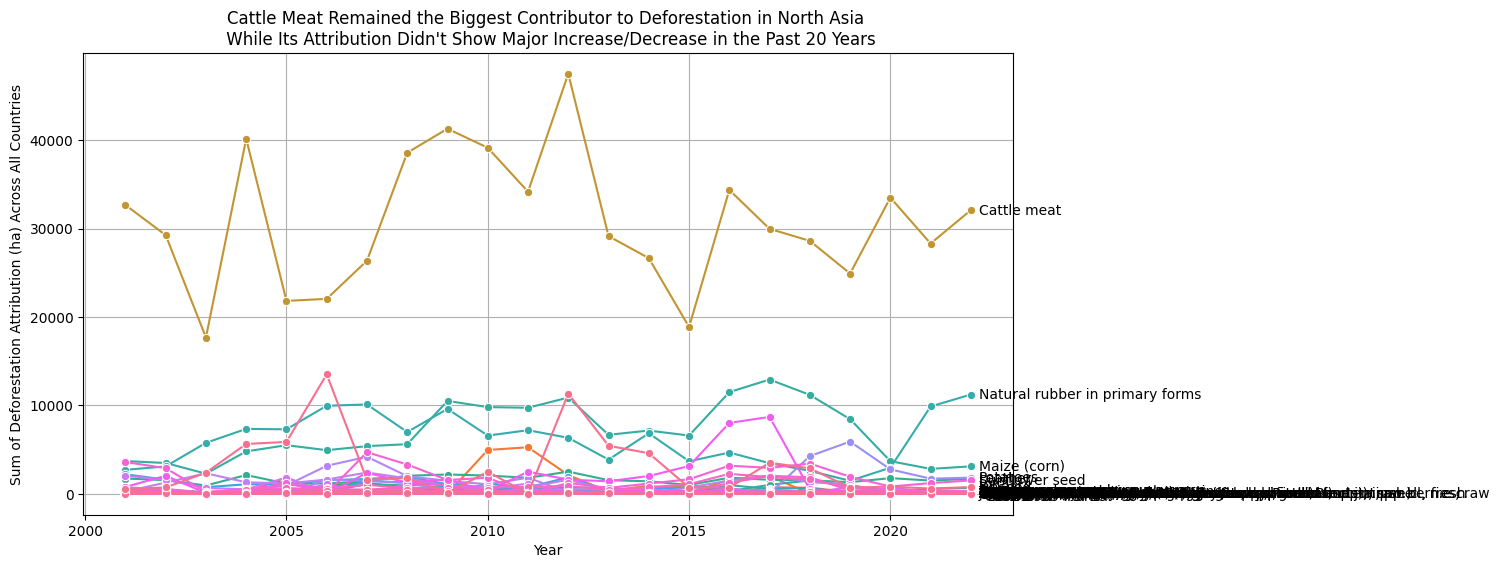

In [ ]:
# Group by Year and Commodity, averaging across Producer countries
df_n_asia_grouped = df_n_asia.groupby(["Year", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_n_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Commodity", marker="o")

for commodity in df_n_asia_grouped["Commodity"].unique():
    subset = df_n_asia_grouped[df_n_asia_grouped["Commodity"] == commodity]
    last_row = subset.iloc[-1]
    plt.text(last_row["Year"] + 0.2, last_row["Deforestation attribution, unamortized (ha)"],
             commodity, fontsize=10, verticalalignment='center')

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.title("Cattle Meat Remained the Biggest Contributor to Deforestation in North Asia \n While Its Attribution Didn't Show Major Increase/Decrease in the Past 20 Years")
plt.grid(True)

plt.legend().remove()

# Show the plot
plt.show()

Cattle meat is the primary deforestation attribution in North Asia. Though the overall level stayed around 30000 ha, there have been huge fluctuations between 2010 and 2013, with a significant dip in 2015.

#### Trends of Deforestation Attribution in Southeast Asia (2000-2022)

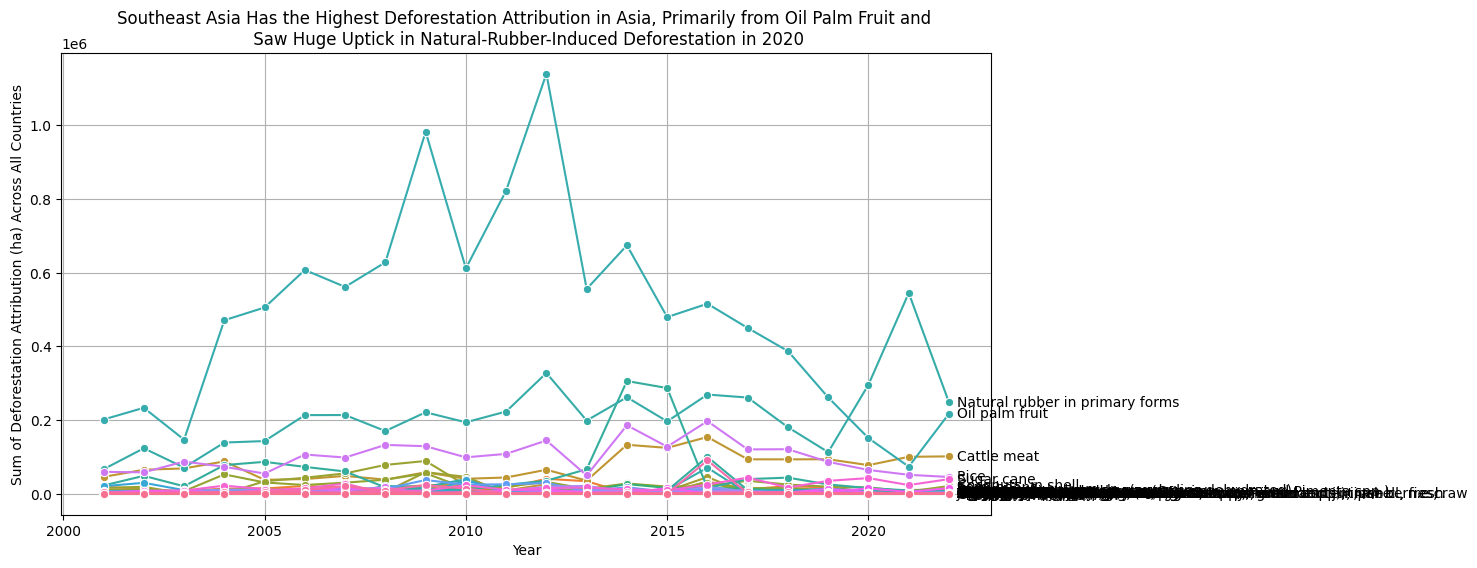

In [ ]:
# Group by Year and Commodity, averaging across Producer countries
df_se_asia_grouped = df_se_asia.groupby(["Year", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_se_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Commodity", marker="o")

for commodity in df_se_asia_grouped["Commodity"].unique():
    subset = df_se_asia_grouped[df_se_asia_grouped["Commodity"] == commodity]
    last_row = subset.iloc[-1]
    plt.text(last_row["Year"] + 0.2, last_row["Deforestation attribution, unamortized (ha)"],
             commodity, fontsize=10, verticalalignment='center')

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.title("Southeast Asia Has the Highest Deforestation Attribution in Asia, Primarily from Oil Palm Fruit and \n Saw Huge Uptick in Natural-Rubber-Induced Deforestation in 2020")
plt.grid(True)

plt.legend().remove()

# Show the plot
plt.show()

This region has reported the highest total deforestation attribution, especially from oil palm fruit, natural rubber in primary forms, and also a more recent uptick in cattle meat. However, one bizarre trend is the huge fluctuation observed in oil palm fruit's deforestation total attribution, notably two huge peaks in 2009 and 2012, following by a continuous decrease from 2016 to 2020, until another uptick in 2021. The following study will look into the potential reason behind the two peaks around 2010 and the following decrease. Another interesting trend is the dramatic increase in deforestation attribution of natural rubber in primary forms from 2019 to 2021. This increase even pushed this commodity to be the highest total deforestation attribution in 2021 in this region.

#### Trends of Deforestation Attribution in the Rest of Asia (2000-2022)

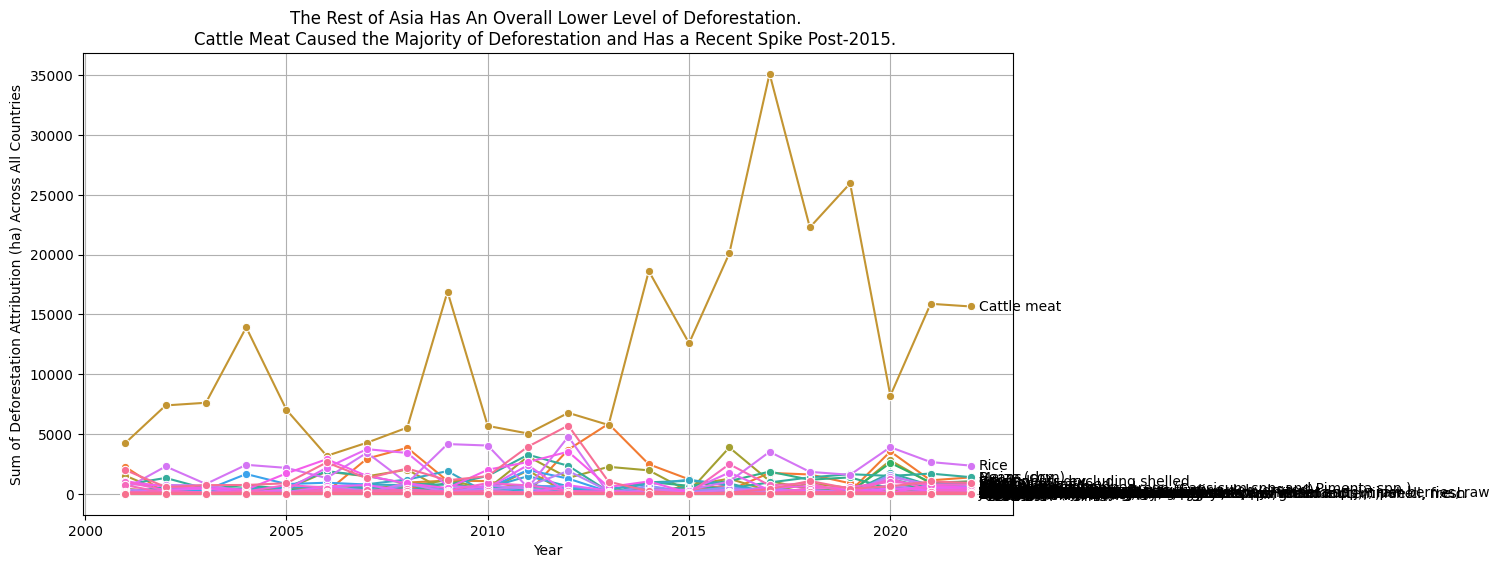

In [ ]:
# Group by Year and Commodity, averaging across Producer countries
df_r_asia_grouped = df_r_asia.groupby(["Year", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_r_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Commodity", marker="o")

for commodity in df_r_asia_grouped["Commodity"].unique():
    subset = df_r_asia_grouped[df_r_asia_grouped["Commodity"] == commodity]
    last_row = subset.iloc[-1]
    plt.text(last_row["Year"] + 0.2, last_row["Deforestation attribution, unamortized (ha)"],
             commodity, fontsize=10, verticalalignment='center')

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.title("The Rest of Asia Has An Overall Lower Level of Deforestation. \nCattle Meat Caused the Majority of Deforestation and Has a Recent Spike Post-2015. ")
plt.grid(True)

plt.legend().remove()

# Show the plot
plt.show()

Overall the total deforestation attribution of the Rest of Asia region is notably smaller compared to the other two regions. The deforestation is driven by two main commodities: unclassified forest plantation and cattle meat. Deforestation attribution from Unclassified Forest Plantation showed steady decrease ever since 2012, while that from Cattle Meat has shown fluctuating yet overall increasing trend since 2012.

**Section Conclusion: The total deforestation attribution from Southeast Asia is completely on a different scale compared to the other two regions of Asia. However, North Asia, comprised of only four countries while also having the largest geographical area, also contributed significant deforestation from Cattle Meat production, aside from Forest Plantation (Unclassified).**

### Deep Dive: Why Does North Asia Have Such High Deforestation Attribution from Unclassified Forest Plantation

In [ ]:
# North Asia's all record that are under Commodity group of "Forest plantation"
fp_n_asia = df[df['Continent/Country group']=='North Asia'][df['Commodity group']=='Forest plantation']
fp_n_asia.head()

<ipython-input-31-ce3525b95766>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
37070,North Asia,CHN,China,2001,Forest plantation,Forest plantation (Bamboo),0.000000,NaN,0.000000,NaN,0.0,0.000000,NaN,5206950.0,0.000000e+00
37071,North Asia,CHN,China,2002,Forest plantation,Forest plantation (Bamboo),0.000000,NaN,0.000000,NaN,0.0,0.000000,NaN,5206950.0,0.000000e+00
37072,North Asia,CHN,China,2003,Forest plantation,Forest plantation (Bamboo),0.000000,NaN,0.000000,NaN,0.0,0.000000,NaN,5206950.0,0.000000e+00
37073,North Asia,CHN,China,2004,Forest plantation,Forest plantation (Bamboo),0.000000,NaN,0.000000,NaN,0.0,0.000000,NaN,5206950.0,0.000000e+00
37074,North Asia,CHN,China,2005,Forest plantation,Forest plantation (Bamboo),0.071539,0.014308,0.000011,0.000002,0.0,0.000002,0.54775,5206950.0,1.373922e-10


In [ ]:
# Types of commodities underr Forest plantation category that exist in North Asia
fp_n_asia['Commodity'].unique()

array(['Forest plantation (Bamboo)', 'Forest plantation (Broadleaf)',
       'Forest plantation (Mix of needleleaf and broadleaf)',
       'Forest plantation (Needleleaf)',
       'Forest plantation (Unclassified)'], dtype=object)

**Look at the changes in unclassified FP's attribution overall compared to the classified ones.**

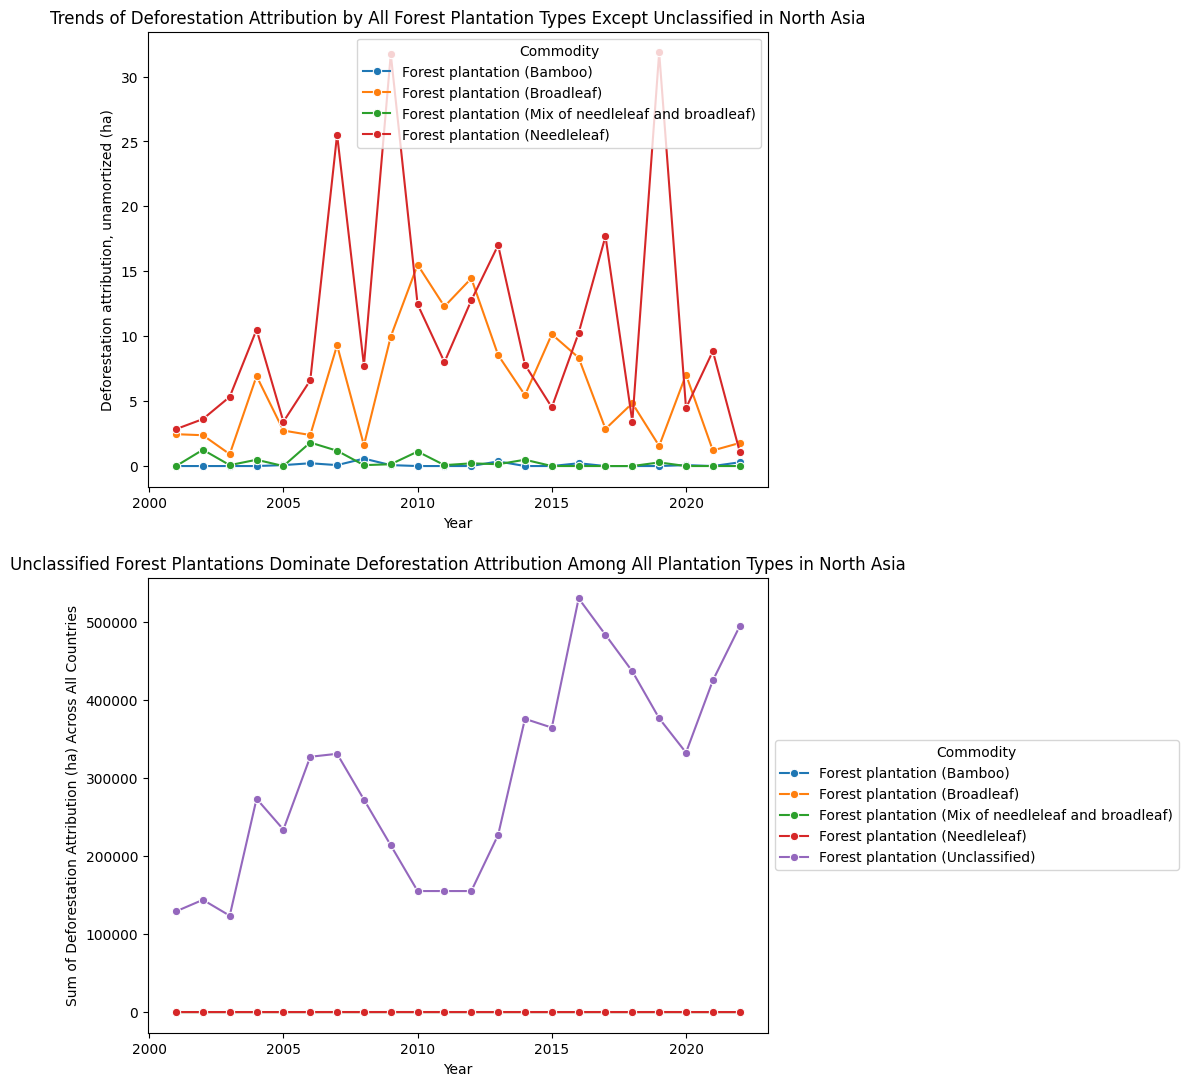

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 13))
## ALL FOREST PLANTATION CATEGORIES EXCEPT UNCLASSIFIED
# Group by Year and Commodity, averaging across Producer countries
fp1_n_asia_grouped = fp_n_asia[fp_n_asia['Commodity']!='Forest plantation (Unclassified)'].groupby(["Year", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
sns.lineplot(data=fp1_n_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Commodity", marker="o",ax=axes[0])
axes[0].set_title("Trends of Deforestation Attribution by All Forest Plantation Types Except Unclassified in North Asia")


## ALL FOREST PLANTATION CATEGORIES
# Group by Year and Commodity, averaging across Producer countries
fp_n_asia_grouped = fp_n_asia.groupby(["Year", "Commodity"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
sns.lineplot(data=fp_n_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Commodity", marker="o", ax=axes[1])
axes[1].set_title("Unclassified Forest Plantations Dominate Deforestation Attribution Among All Plantation Types in North Asia")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.legend(title="Commodity", loc="center left", bbox_to_anchor=(1, 0.5))

Unclassified forest plantation creates a total deforestation attribution of half a million times of the other classified forest plantation commodity, like bamboo. This huge gap poses a question of whether this is simply due to lack of data clarity or a undiscovered forest plantation category that needs to be discovered. Therefore, below is a futher investigation into the deforestation attribution of each of four North Asian countries.

Text(0.5, 1.0, 'Deforestation Attribution by Unclassified Forest Plantation Was Mostly Driven by China')

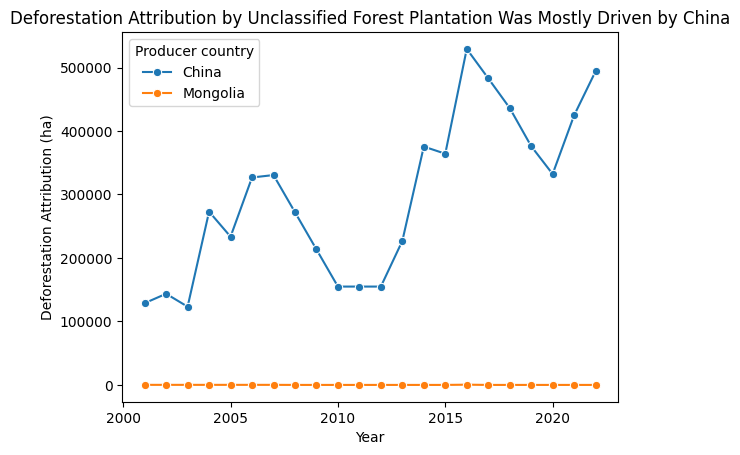

In [ ]:
# Group by Year and Commodity, averaging across Producer countries
ufp_n_asia_grouped = fp_n_asia[fp_n_asia['Commodity']=='Forest plantation (Unclassified)'].groupby(["Year", "Producer country"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
sns.lineplot(data=ufp_n_asia_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Producer country", marker="o")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Deforestation Attribution (ha)")
plt.title('Deforestation Attribution by Unclassified Forest Plantation Was Mostly Driven by China')

**Discussion** <br>
The above investigation has produced one single question: why does China alone contributed nearly 450,000 ha of deforestation (unamortized) ever year after 2015? What kind of forest plantation is it? However, some background research into the forest policy in China unveiled the answer. <br>
According to Global Forest Watch, from 2000 to 2020, China experienced a net gain of 2.14 Mha in tree cover, which was a direct result of multiple reforestation and forest conservation programs the Chinese government rolled out since the 1980s, the most famous program beingg the Great Green Wall of China project in 1978 that aimed at holding back the expansion of the Gobi Desert and providing timber to local population. With high-scale implementation of the programs in the 2000s, in addition to a nationwide ban on felling natural forests between 2014 and 2017, the overall reforestation could possible explain the sharp increasing trend in Unclassified Forest Plantation observed in the chart above. Furthermore, in 2020, the Chinese Government revised the Forestry Law for comprehensive Protection of Natural Forests, as a part of its response to the COVID-19 pandemics, as wildlife trade and deforestation are inherently connected. This new law reinstated the ban on illegal deforestation and expanding responsible logging, which is tied to its decades-long reforestation programs. This, combined with the post-Pandemics economic recovery, possibly explains the increase in forest plantation after 2020 shown in the chart above. <br>
This is a strong example of how data can misrepresent reality. Since the DeDuCE data model relies on remotely sensed datasets combined with agricultural statistics, it cannot differentiate between reforested areas and deforested land repurposed for commodity production. To ensure data integrity and accuracy, it is crucial to conduct a thorough investigation into the dataset and its underlying assumptions. <br>
**Source**:
<br>
https://eia.org/blog/20200708-chinas-new-approach-in-updated-forest-law/<br>
https://earth.org/what-is-the-great-green-wall-in-china/#<br>
https://www.wordforest.org/2024/03/08/chinas-reforestation-journey/<br>
https://www.globalforestwatch.org/dashboards/country/CHN/?category=forest-change&location=WyJjb3VudHJ5IiwiQ0hOIl0%3D&scrollTo=net-change

### Deep Dive: What Are Some Interesting Trends in Palm-Oil-Production-Related Deforestation in Southeast Asia

In [ ]:
# Create dataframe for oil palm commodity in Southeast Asia
po_se_asia = df[df['Continent/Country group']=='Southeast Asia'][df['Commodity']=='Oil palm fruit']
po_se_asia.head()

<ipython-input-35-48ce26dce044>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
25256,Southeast Asia,BRN,Brunei,2001,Oilseeds and oleaginous fruits,Oil palm fruit,0.153337,NaN,0.000078,NaN,0.000004,0.000004,0.709344,134.0,0.000011
25257,Southeast Asia,BRN,Brunei,2002,Oilseeds and oleaginous fruits,Oil palm fruit,0.000000,NaN,0.000000,NaN,0.000004,0.000004,NaN,134.0,0.000000
25258,Southeast Asia,BRN,Brunei,2003,Oilseeds and oleaginous fruits,Oil palm fruit,0.000000,NaN,0.000000,NaN,0.000004,0.000004,NaN,134.0,0.000000
25259,Southeast Asia,BRN,Brunei,2004,Oilseeds and oleaginous fruits,Oil palm fruit,0.000000,NaN,0.000000,NaN,0.000004,0.000004,NaN,134.0,0.000000
25260,Southeast Asia,BRN,Brunei,2005,Oilseeds and oleaginous fruits,Oil palm fruit,0.076719,0.046011,0.000046,0.000025,0.000008,0.000033,0.709344,134.0,0.000006


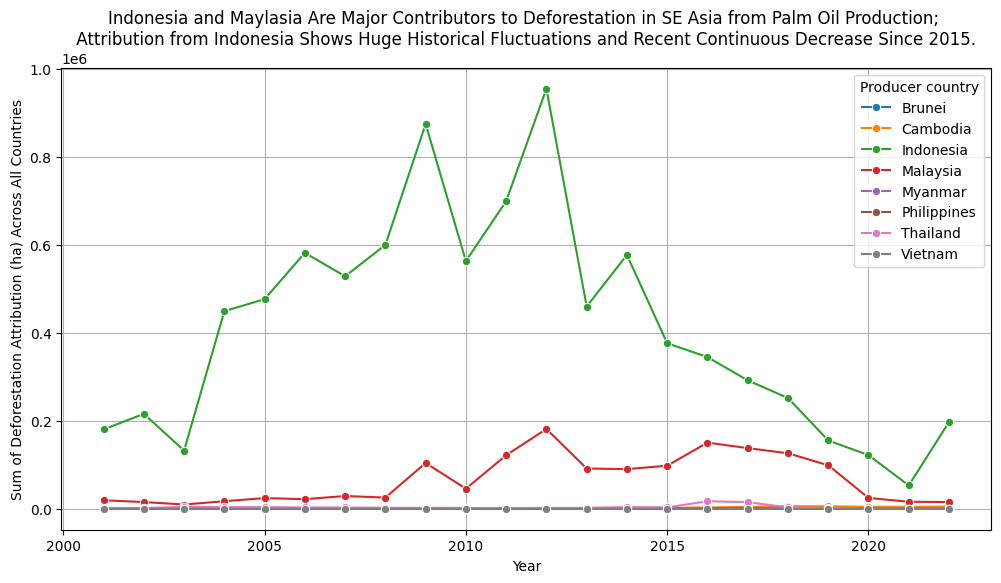

In [ ]:
# Group by Year and Commodity, summing across Producer countries
po_se_asia_country_grouped = po_se_asia.groupby(["Year", "Producer country"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=po_se_asia_country_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Producer country", marker="o")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.title("Indonesia and Maylasia Are Major Contributors to Deforestation in SE Asia from Palm Oil Production; \n Attribution from Indonesia Shows Huge Historical Fluctuations and Recent Continuous Decrease Since 2015. ")
plt.grid(True)

# Show the plot
plt.show()

This shows that the peaks between 2008 and 2015 area primarily driven by Indonesia. And following continuous decrease in deforestation attribution since 2015, there has been a recent uptick in 2021.

**Discussion**
<br>
The overall deforestation trends due to oil palm fruits are well documented by existing studies on Borneo's industrial plantation, which covers both Indonesia and Malaysia. A research posted at Society for Conservation Biology determines that annual plantation expansion is positively correlated with annual forest loss in Borneo of both Malaysia and Indonesia. It has identified that the planted area (88% oil palm, 12% pulpwood) increased 170% since 2000. Borneo has gained 6.2 Mha of industrial plantations. This expansion peaked in 2009 (0.70 Mha added) and 2012 (0.6 Mha added). The research also points out that forest conversion in Borneo declined year-on-year since 2012 in both countries. Notably, the especially sharper decrease in 2015 in Indonesia compared to Malaysia was due to Indonesian forest fires. Fires impacted large areas of Central Kalimantan and its remaining forests in 2015. Mass deforestation in the Indonesian part of Borneo has led to more frequent droughts and fires in more recent years. <br>

**Source**:
https://conbio.onlinelibrary.wiley.com/doi/10.1111/conl.12622#:~:text=Over%20the%2017%20years%2C%20Borneo,and%20Malaysian%20Borneo%2C%20respectively).

### Deeper Dive: How Can We Explain the 2020 Uptick in Natural-Rubber-Production-Induced Deforestation in Southeast Asia

In [ ]:
nr_se_asia = df[df['Continent/Country group']=='Southeast Asia'][df['Commodity']=='Natural rubber in primary forms']
nr_se_asia.head()

<ipython-input-37-2c6ee2b56288>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Continent/Country group,ISO,Producer country,Year,Commodity group,Commodity,"Deforestation attribution, unamortized (ha)","Deforestation risk, amortized (ha)","Deforestation emissions excl. peat drainage, unamortized (MtCO2)","Deforestation emissions excl. peat drainage, amortized (MtCO2)",Peatland drainage emissions (MtCO2),"Deforestation emissions incl. peat drainage, amortized (MtCO2)",Quality Index,LandArea_km2,Deforestation per km2
25234,Southeast Asia,BRN,Brunei,2001,Fibre crops,Natural rubber in primary forms,53.199625,NaN,-0.015420,NaN,0.0,0.000000,0.259393,134.0,0.003970
25235,Southeast Asia,BRN,Brunei,2002,Fibre crops,Natural rubber in primary forms,38.500232,NaN,-0.010862,NaN,0.0,0.000000,0.243391,134.0,0.002873
25236,Southeast Asia,BRN,Brunei,2003,Fibre crops,Natural rubber in primary forms,0.536810,NaN,0.000396,NaN,0.0,0.000000,0.774400,134.0,0.000040
25237,Southeast Asia,BRN,Brunei,2004,Fibre crops,Natural rubber in primary forms,4.258114,NaN,-0.001163,NaN,0.0,0.000000,0.264731,134.0,0.000318
25238,Southeast Asia,BRN,Brunei,2005,Fibre crops,Natural rubber in primary forms,37.582291,26.815414,-0.010893,-0.007589,0.0,-0.007589,0.255179,134.0,0.002805


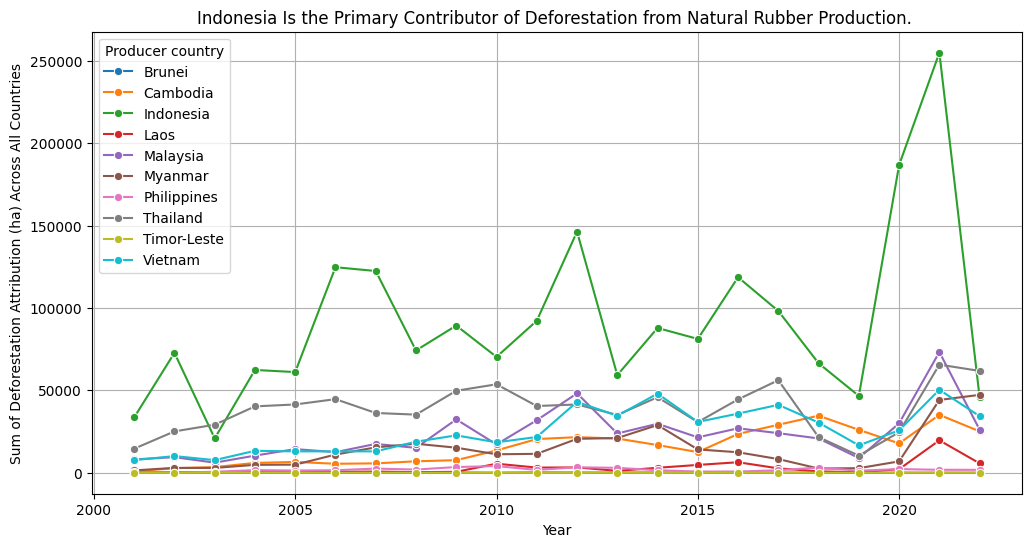

In [ ]:
# Group by Year and Commodity, summing across Producer countries
nr_se_asia_country_grouped = nr_se_asia.groupby(["Year", "Producer country"])["Deforestation attribution, unamortized (ha)"].sum().reset_index()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=nr_se_asia_country_grouped, x="Year", y="Deforestation attribution, unamortized (ha)", hue="Producer country", marker="o")

# Formatting the chart
plt.xlabel("Year")
plt.ylabel("Sum of Deforestation Attribution (ha) Across All Countries")
plt.title("Indonesia Is the Primary Contributor of Deforestation from Natural Rubber Production. ")
plt.grid(True)

# Show the plot
plt.show()

**Discussion** <br>
This chart reveals that the 2020–2021 uptick in deforestation due to natural rubber production was primarily driven by Indonesia. Trade flow analysis indicates that Indonesia’s Technically Specified Natural Rubber saw a 66% increase in global market share in 2021, alongside a 0.8% increase for natural rubber latex and a 15.6% increase for smoked sheets natural rubber. These market trends suggest that the surge in deforestation attribution for this commodity was likely a direct result of increased production.<br>
Additionally, all Southeast Asian countries experienced a spike in deforestation from natural rubber production in 2021, albeit at different scales, before this trend subsided in 2022. This pattern aligns with the surge in global demand for medical gloves during the COVID-19 pandemic, which temporarily drove up rubber consumption. The sharp decline in 2022 suggests that this demand wave was drastic yet short-lived. <br>

**Source**:
https://www.researchgate.net/publication/377645724_Indonesia_Natural_Rubber_Export_Competitiveness_Analysis_in_World_Export_Market
